# Exercise information

https://huggingface.co/learn/audio-course/en/chapter2/hands_on


1. Use 🤗 Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.
2. Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?
3. Plot this example’s waveform and spectrogram.
4. Go to 🤗 Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
5. Compare the transcription that you get from the pipeline to the transcription provided in the example.


# 1. Use 🤗 Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.

In [ ]:
pip install datasets[audio]

In [2]:
pip install -U datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

In [13]:
from datasets import load_dataset
from datasets import Audio

voxpopuli = load_dataset("facebook/voxpopuli", "fi", split = "train", streaming = True) # load only train, english doesn't have train for some reason, just test, sampling rate is already 16_000

# 2. Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?

In [16]:
first3 = list(voxpopuli.take(3)) # first 3 examples
first3

[{'audio_id': '20190327-0900-PLENARY-fi_20190327-18:47:03_12',
  'language': 10,
  'audio': {'path': 'train_part_0/20190327-0900-PLENARY-fi_20190327-18:47:03_12.wav',
   'array': array([2.74658203e-04, 2.44140625e-04, 3.05175781e-05, ...,
          6.71386719e-04, 1.80053711e-03, 2.22778320e-03]),
   'sampling_rate': 16000},
  'raw_text': 'Hänen kanssaan on ollut erittäin miellyttävä tehdä töitä samoin kuin muidenkin esittelijöiden kanssa. Haluan myös todeta, että omalta osaltani tämä lienee myös sitten viimeinen puheenvuoro.',
  'normalized_text': 'hänen kanssaan on ollut erittäin miellyttävä tehdä töitä samoin kuin muidenkin esittelijöiden kanssa. haluan myös todeta että omalta osaltani tämä lienee myös sitten viimeinen puheenvuoro.',
  'gender': 'female',
  'speaker_id': '28314',
  'is_gold_transcript': False,
  'accent': 'None'},
 {'audio_id': '20130116-0900-PLENARY-12-fi_20130116-17:04:15_4',
  'language': 10,
  'audio': {'path': 'train_part_0/20130116-0900-PLENARY-12-fi_20130116-

In [18]:
example3 = list(first3)[-1] # acess last element aka the third example
example3

{'audio_id': '20140116-0900-PLENARY-11-fi_20140116-15:43:05_2',
 'language': 10,
 'audio': {'path': 'train_part_0/20140116-0900-PLENARY-11-fi_20140116-15:43:05_2.wav',
  'array': array([ 0.05813599,  0.06384277, -0.01403809, ...,  0.00213623,
          0.00143433, -0.00015259]),
  'sampling_rate': 16000},
 'raw_text': 'Erityisen tuomittavaa ovat tiedot jatkuvista hyökkäyksistä uskonnollisia ja kulttuurisia vähemmistöjä kohtaan.',
 'normalized_text': 'erityisen tuomittavaa ovat tiedot jatkuvista hyökkäyksistä uskonnollisia ja kulttuurisia vähemmistöjä kohtaan.',
 'gender': 'male',
 'speaker_id': '96686',
 'is_gold_transcript': False,
 'accent': 'None'}

In [19]:
id2label = voxpopuli.features["language"].int2str
id2label(example3["language"]) # checking that language: 10 is finnish

'fi'

Given the feautures this example has, this dataset can be used for the following audio tasks:

1. Audio classification between male and female and accent recognition
2. Speaker diarization as we have the speaker_id
3. Automatic speech recognition

# 3. Plot this example’s waveform and spectrogram

'audio': {'path': 'train_part_0/20190327-0900-PLENARY-fi_20190327-18:47:03_12.wav',
   'array': array([2.74658203e-04, 2.44140625e-04, 3.05175781e-05, ...,
          6.71386719e-04, 1.80053711e-03, 2.22778320e-03]),
   'sampling_rate': 16000},

In [32]:
array = example3["audio"]["array"]
sampling_rate = example3["audio"]["sampling_rate"]

## Waveform

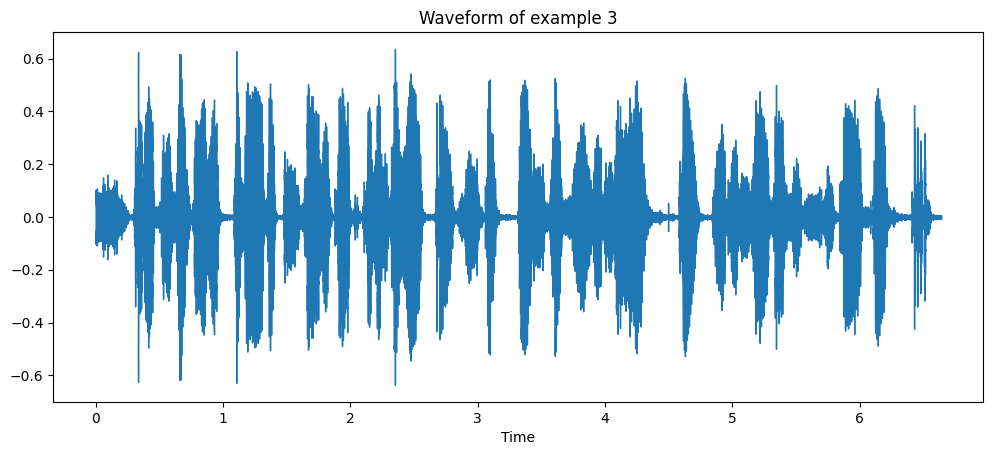

In [35]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
plt.title("Waveform of example 3")
librosa.display.waveshow(array, sr=sampling_rate)

## Spectrogram

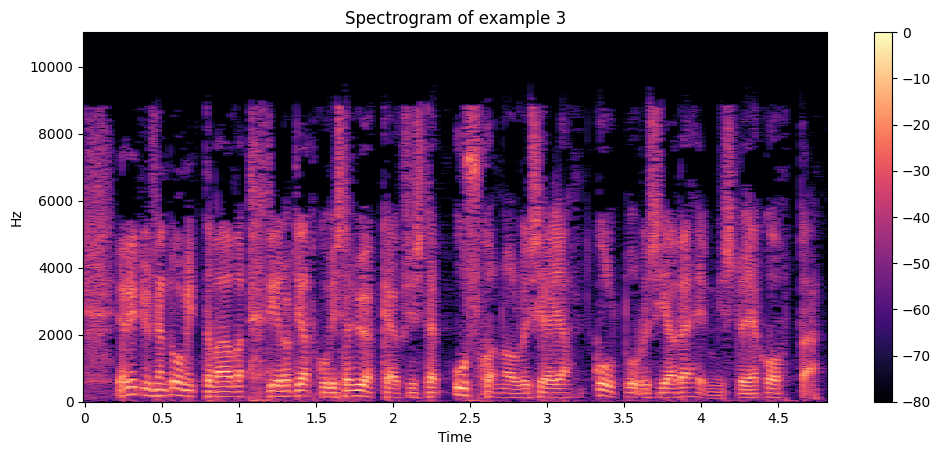

In [37]:
import numpy as np
import matplotlib.pyplot as plt

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
plt.title("Spectrogram of example 3")
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

# 4. Go to 🤗 Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.

In [41]:
example3['normalized_text'] # provided transcription

'erityisen tuomittavaa ovat tiedot jatkuvista hyökkäyksistä uskonnollisia ja kulttuurisia vähemmistöjä kohtaan.'

In [40]:
from transformers import pipeline


asr = pipeline("automatic-speech-recognition",model="Finnish-NLP/wav2vec2-xlsr-300m-finnish-lm")
asr(example3["audio"]["array"])

config.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

Could not load the `decoder` for Finnish-NLP/wav2vec2-xlsr-300m-finnish-lm. Defaulting to raw CTC. Error: No module named 'kenlm'
Try to install `kenlm`: `pip install kenlm
Try to install `pyctcdecode`: `pip install pyctcdecode
Device set to use cpu


{'text': 'erityisen tuomittava ovat tiedot jatkuvista hyökkäyksistä uskonnollisia ja kulttuurisia vähemmistöjä kohtaan'}

# 5. Compare the transcription that you get from the pipeline to the transcription provided in the example.

It is the same text